# Emulating the fitting formulas for Coupled Dark Energy

## Import Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import time

In [2]:
from looti import dictlearn as dcl
from looti import datahandle as dhl
from looti import PlottingModule as pm
from looti import tools as too
from looti import PlottingModule as pm

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Import Data

The data is imported from pandas Dataframes which have been previously created using the `read_files` module.
The DataFrames contain the k-grid and the power spectrum at each redshift and each parameter variation, for the extended model and the reference model.

### Specify Paths

In [4]:
data_folder = '../../SimulationData/Massive_Nus/'
results_folder = './results/'

In [5]:
too.mkdirp(results_folder)    ## If directory does not exists, it is created here

### Load CoupledDE dataframes

The user should provide : 
- datafile_ext : filename containing the power spectra of the extended model
- datafile_ref : filename containing the power spectra of the reference model (i.e. LCDM)

In [6]:
###Name of the file for the external input data, without the extension
datafile_ext = 'Massive_Nus'
###Name of the file for the LCDM input data
datafile_ref = 'Massive_Nus_LCDM'

In [7]:
## Specify paths and the number of free cosmological parameters to interpolate
emulation_data = dhl.DataHandle( datafile_ext, data_folder, datafile_ref, num_parameters=3) 
emulation_data.read_csv_pandas() 
emulation_data.calculate_ratio_by_redshifts(emulation_data.z_vals)

### Choose the level of noise

## Calculate power spectra ratios at all redshifts available

In [8]:
# Available redshifts
emulation_data.z_vals

array([0.    , 0.2632, 0.5263, 0.7895, 1.0526, 1.3158, 1.5789, 1.8421,
       2.1053, 2.3684, 2.6316, 2.8947, 3.1579, 3.4211, 3.6842, 3.9474,
       4.2105, 4.4737, 4.7368, 5.    ])

In [61]:
## Set normalize=False, since Fitting Formulae are already normalized
## First argument contains all the redshifts at which simulations are available
emulation_data.calculate_ratio_by_redshifts(emulation_data.z_vals,normalize=True)

# Define number of training and test

## Choose  the number of training vectors, test vectors and number of data splits

In [200]:
from sklearn.utils import shuffle
n_train = 99 # Number of training vectors without taking acount the extrema 
n_test = 1 # Number of test vectors without taking acount the extrema
n_splits = 1  # Number of splits
npca = 60

Params = []
RMSE_array = []
for j in range (100):
    test_indices= [j]## List of list of indices, one list per split
    emulation_data.calculate_data_split(n_train=n_train, ##number of training vectors/ redshift
                                    n_test=n_test, ##number of test vectors
                                    verbosity=0,
                                    manual_split=True,
                                    test_indices=test_indices,
                                    train_redshift_indices=[0],##Indices of the redshifts used for the train vect.
                                    test_redshift_indices=[0]) ##Indices of the redshifts used for the test vect.
    ratios_predicted , emulation_data = dcl.Predict_ratio(emulation_data,Operator = "PCA",
                                                      train_noise = 1e-7, ##noise for the GP's kernel
                                                      gp_n_rsts = 10,##times allowed to restart the optimiser
                                                      ncomp=npca , ##number of components
                                                      gp_const = 1, ##Constant for the RBF kernel
                                                      gp_length = 1 , ## Length for  GP 
                                                      interp_type='GP', ##kind of interpolator,e.g int1d or GP 
                                                      n_splits = 1, ##number of splits
                                                      test_indices=test_indices, ##indices of the test vectors/redshift 
                                                      train_redshift_indices= [1], ##indices of the reshift used for train 
                                                      test_redshift_indices= [1]) ##indices of the reshift used for test 
                                                     
    Ratios = list (ratios_predicted.values())
    Ratios_truth = emulation_data.matrix_datalearn_dict["theo"]["test"]
    Params.append([list(rr) for rr in ratios_predicted.keys()])
    RMSE_array.append(too.root_mean_sq_err(Ratios_truth[0],Ratios[0]))   
    

('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)
('Shape of PCA matrix: (100, 60)',)
('Number of PCA components: 60',)


In [184]:
Ratios = np.array(list (ratios_predicted.values()))

In [185]:
Params =np.array([list(rr) for rr in ratios_predicted.keys()])

In [186]:
Ratios_truth = emulation_data.matrix_datalearn_dict["theo"]["test"]

In [187]:
RMSE_array = []
for i in range(len(Params)):
    RMSE_array.append(too.root_mean_sq_err(Ratios_truth[i],Ratios[i]))


In [211]:
Param=np.array(Params)

In [212]:
Params = Params.reshape((100,4))

In [253]:
from scipy.interpolate import Rbf
rbfi = Rbf(Params[:,1],Params[:,2], RMSE_array)  # radial basis function interpolator instance
X = np.linspace(np.min(Params[:,1]), np.max(Params[:,1]), 100)
Y = np.linspace(np.min(Params[:,2]), np.max(Params[:,2]), 100)
x,y = np.meshgrid(X,Y)
Z= rbfi(x,y)

In [303]:
from scipy.interpolate import Rbf
param_x,param_y = 1,2

rbfi = Rbf(Params[:,param_x],Params[:,param_y ], RMSE_array)  # radial basis function interpolator instance
X = np.linspace(np.min(Params[:,param_x]), np.max(Params[:,param_x]), 100)
Y = np.linspace(np.min(Params[:,param_y ]), np.max(Params[:,param_y ]), 100)
x,y = np.meshgrid(X,Y)
Z= rbfi(x,y)

<IPython.core.display.Javascript object>


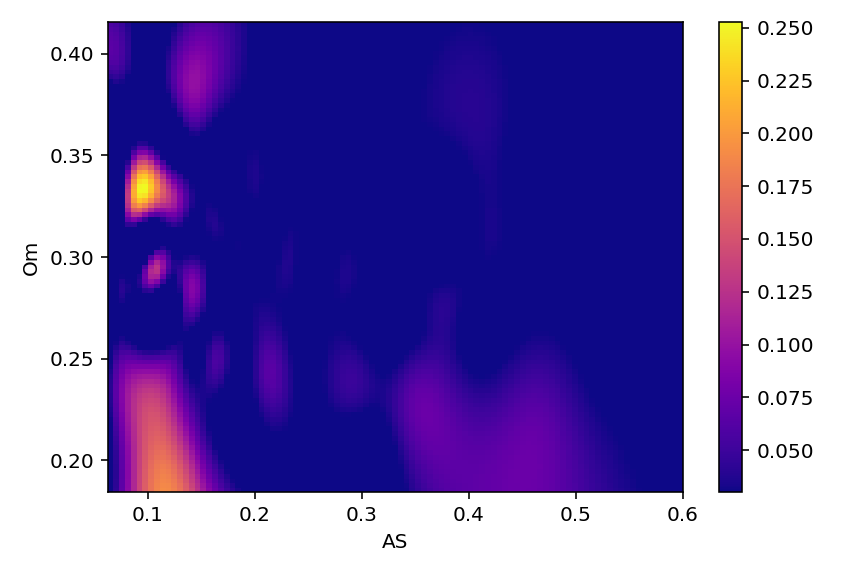

In [304]:
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z=Z
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(0.03, z.max())

cmap = plt.get_cmap('plasma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
fig, ax0 = plt.subplots(nrows=1)
im = ax0.pcolormesh(x,y,Z.clip(min=0.03),cmap=cmap)
ax0.set_xlabel("AS")
ax0.set_ylabel("Om")
fig.tight_layout()
fig.colorbar(im, ax=ax0)
plt.show()

<IPython.core.display.Javascript object>


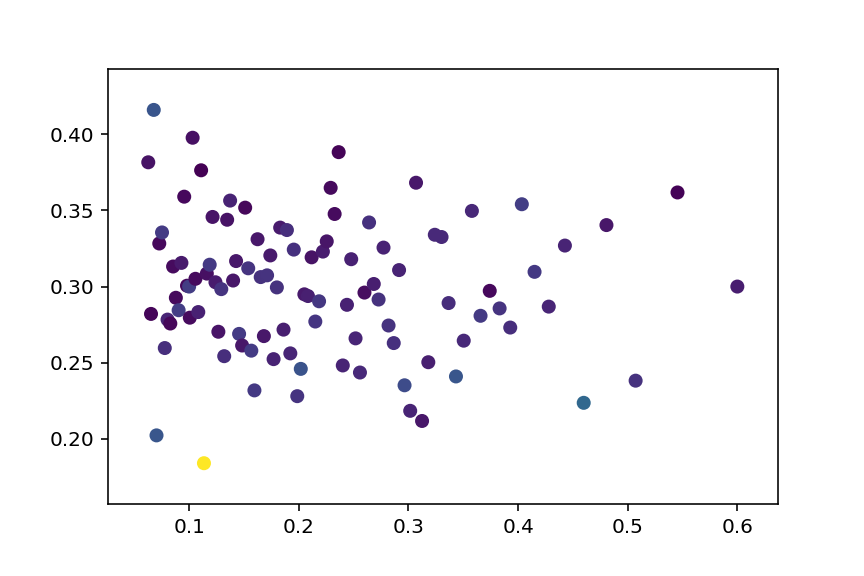

In [305]:
plt.figure()
plt.scatter(Params[:,1],Params[:,2],  c=RMSE_array)
plt.show()

In [310]:
len(emulation_data.matrix_ratios_dict["theo"])/len(emulation_data.z_requested)

101.0

In [290]:
import matplotlib.pyplot as plt
plt.scatter(Params[:,2],Params[:,3],  c=RMSE_array)
plt.show()

<IPython.core.display.Javascript object>


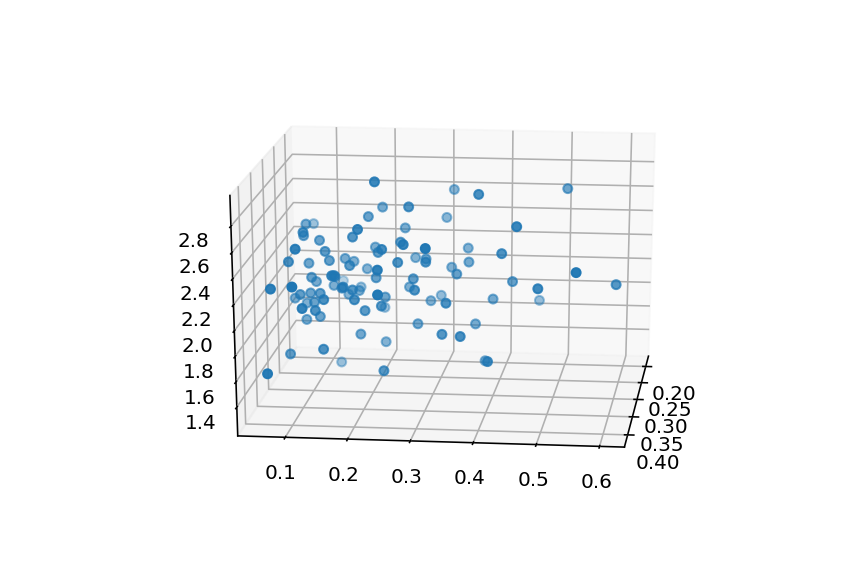

In [285]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Params[:,2],Params[:,1],Params[:,3])
plt.show()

In [252]:
Z=rbfi(x,y,yy)

Text(0.5, 1.0, 'pcolormesh with levels')

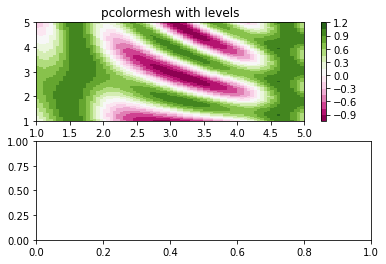

In [107]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

In [24]:
emulation_data

idx = pd.IndexSlice
if emulation_data.multiple_z:
    ind = idx[emulation_data.level_of_noise,Params[0][0]] # first value is the redshift
else :
    ind = idx[emulation_data.level_of_noise,:]
for i in range (emulation_data.num_parameters):
    if multiple_redshift:
        ind += idx[:,list_of_parameters_and_redshift[i+1]] # first value is the redshift
    else : 
        ind += idx[:,list_of_parameters_and_redshift[i]] 



NameError: name 'multiple_redshift' is not defined

In [ ]:
reconstructed_spectra = dcl.reconstruct_spectra(ratios_predicted,emulation_data = emulation_data,normalization=False)
pm.Plot_prediction_One_parameter(emulation_data, 0.098 , reconstructed_spectra,ratio_mode=False,y_scale_log=True)

In [ ]:
emulation_data.test_samples

# GP Example

In [ ]:
re

The following example used a mask to ignore the value before k<0.1 

In [16]:
ratios_predicted , emulation_data = dcl.Predict_ratio(emulation_data,Operator = "GP",
                                                      train_noise = 1e-7, ##noise for the GP's kernel
                                                      gp_n_rsts = 10,##times allowed to restart the optimiser
                                                      ncomp=npca , ##number of components
                                                      gp_const = 1, ##Constant for the RBF kernel
                                                      gp_length = 1 , ## Length for  GP 
                                                      interp_type='GP', ##kind of interpolator,e.g int1d or GP 
                                                      n_splits = n_splits, ##number of splits
                                                      test_indices=test_indices, ##indices of the test vectors/redshift 
                                                      train_redshift_indices= [1], ##indices of the reshift used for train 
                                                      test_redshift_indices= [1] )##indices of the reshift used for test 

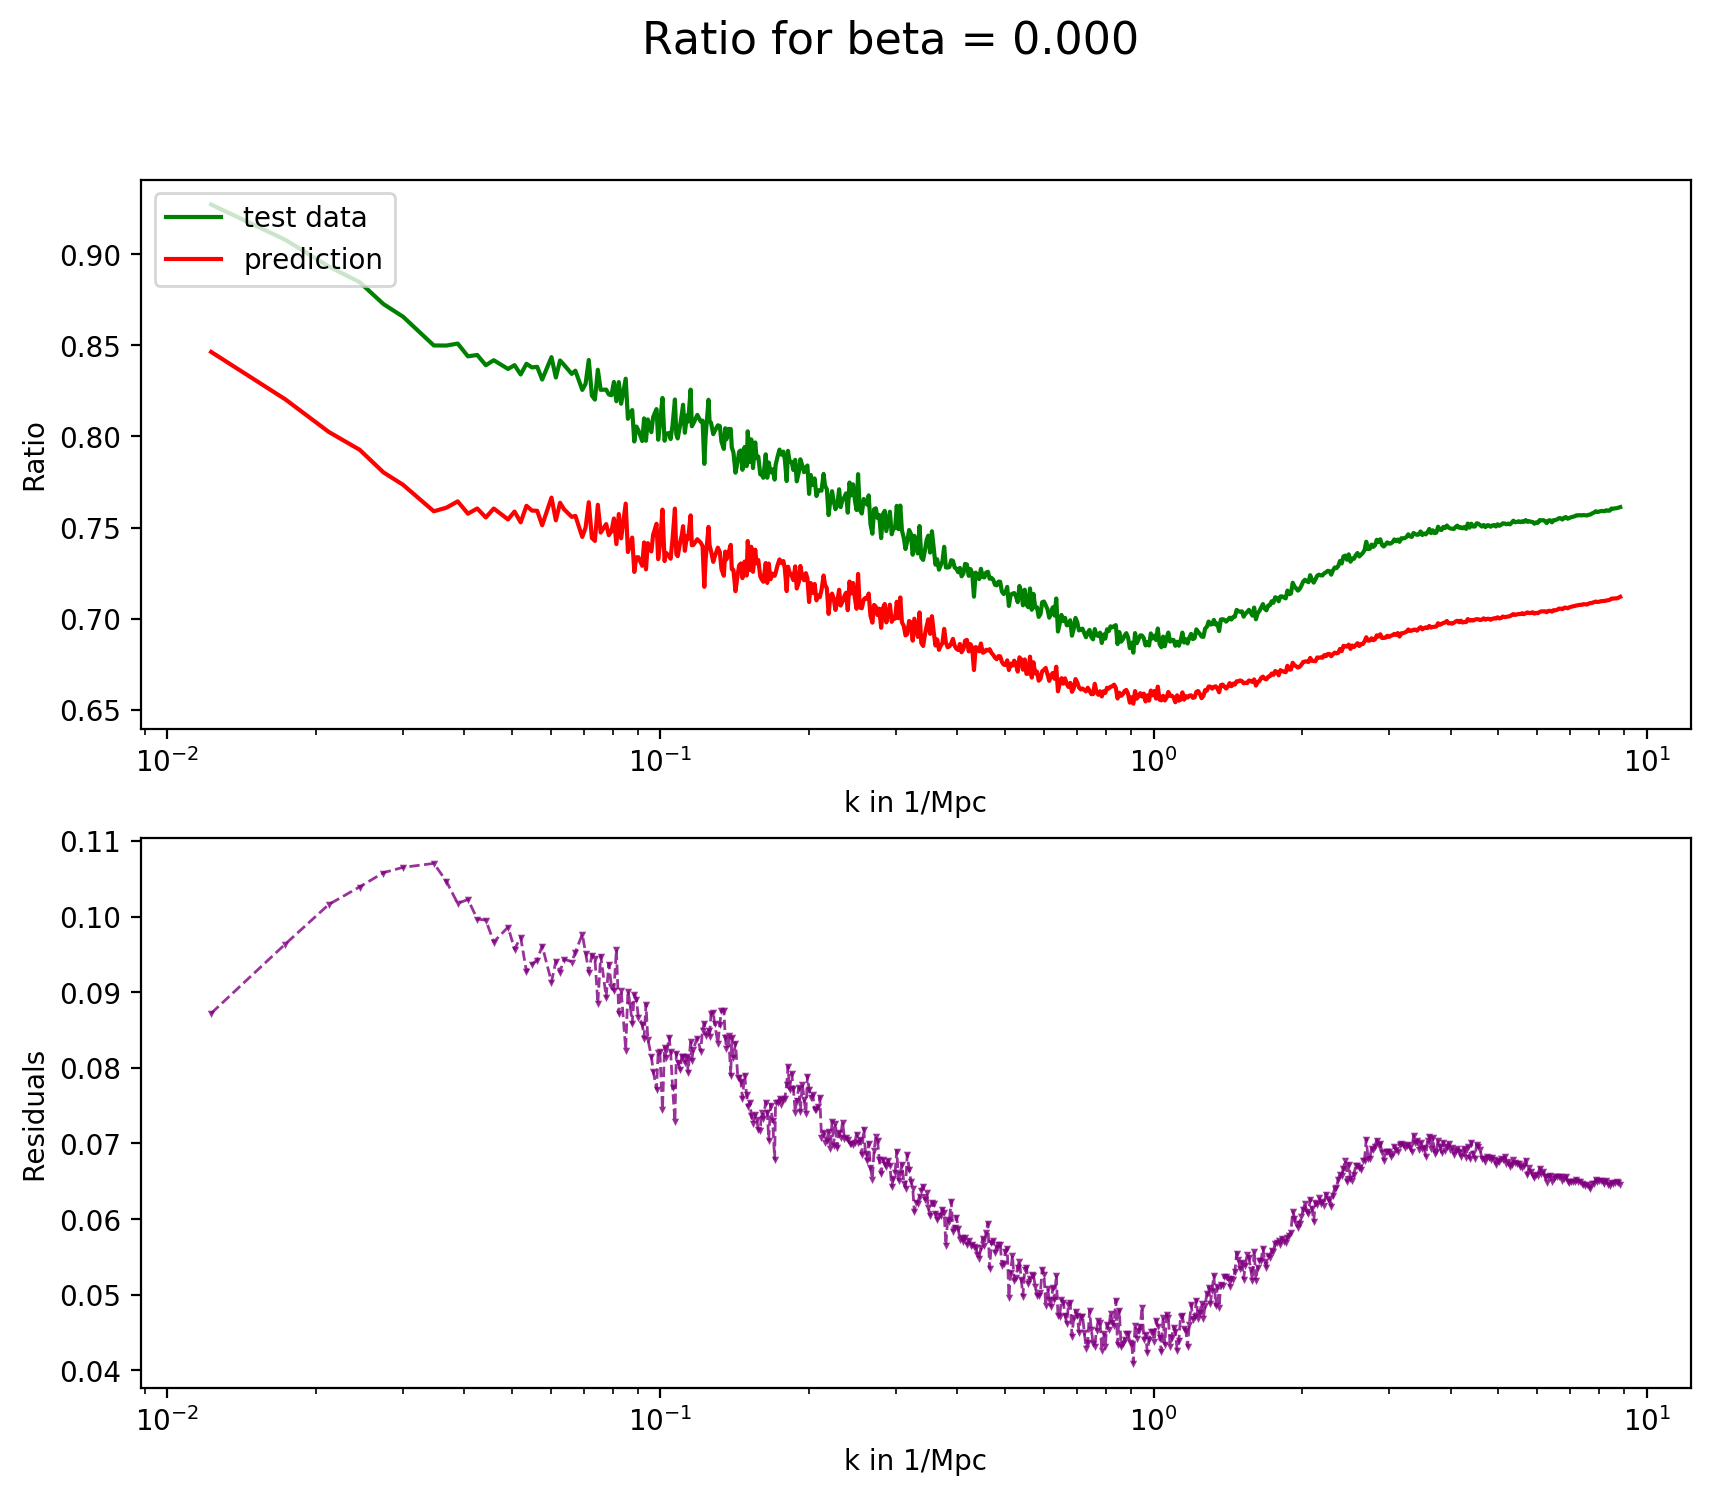

In [17]:
pm.Plot_prediction_One_parameter(emulation_data, 0.098,ratios_predicted)

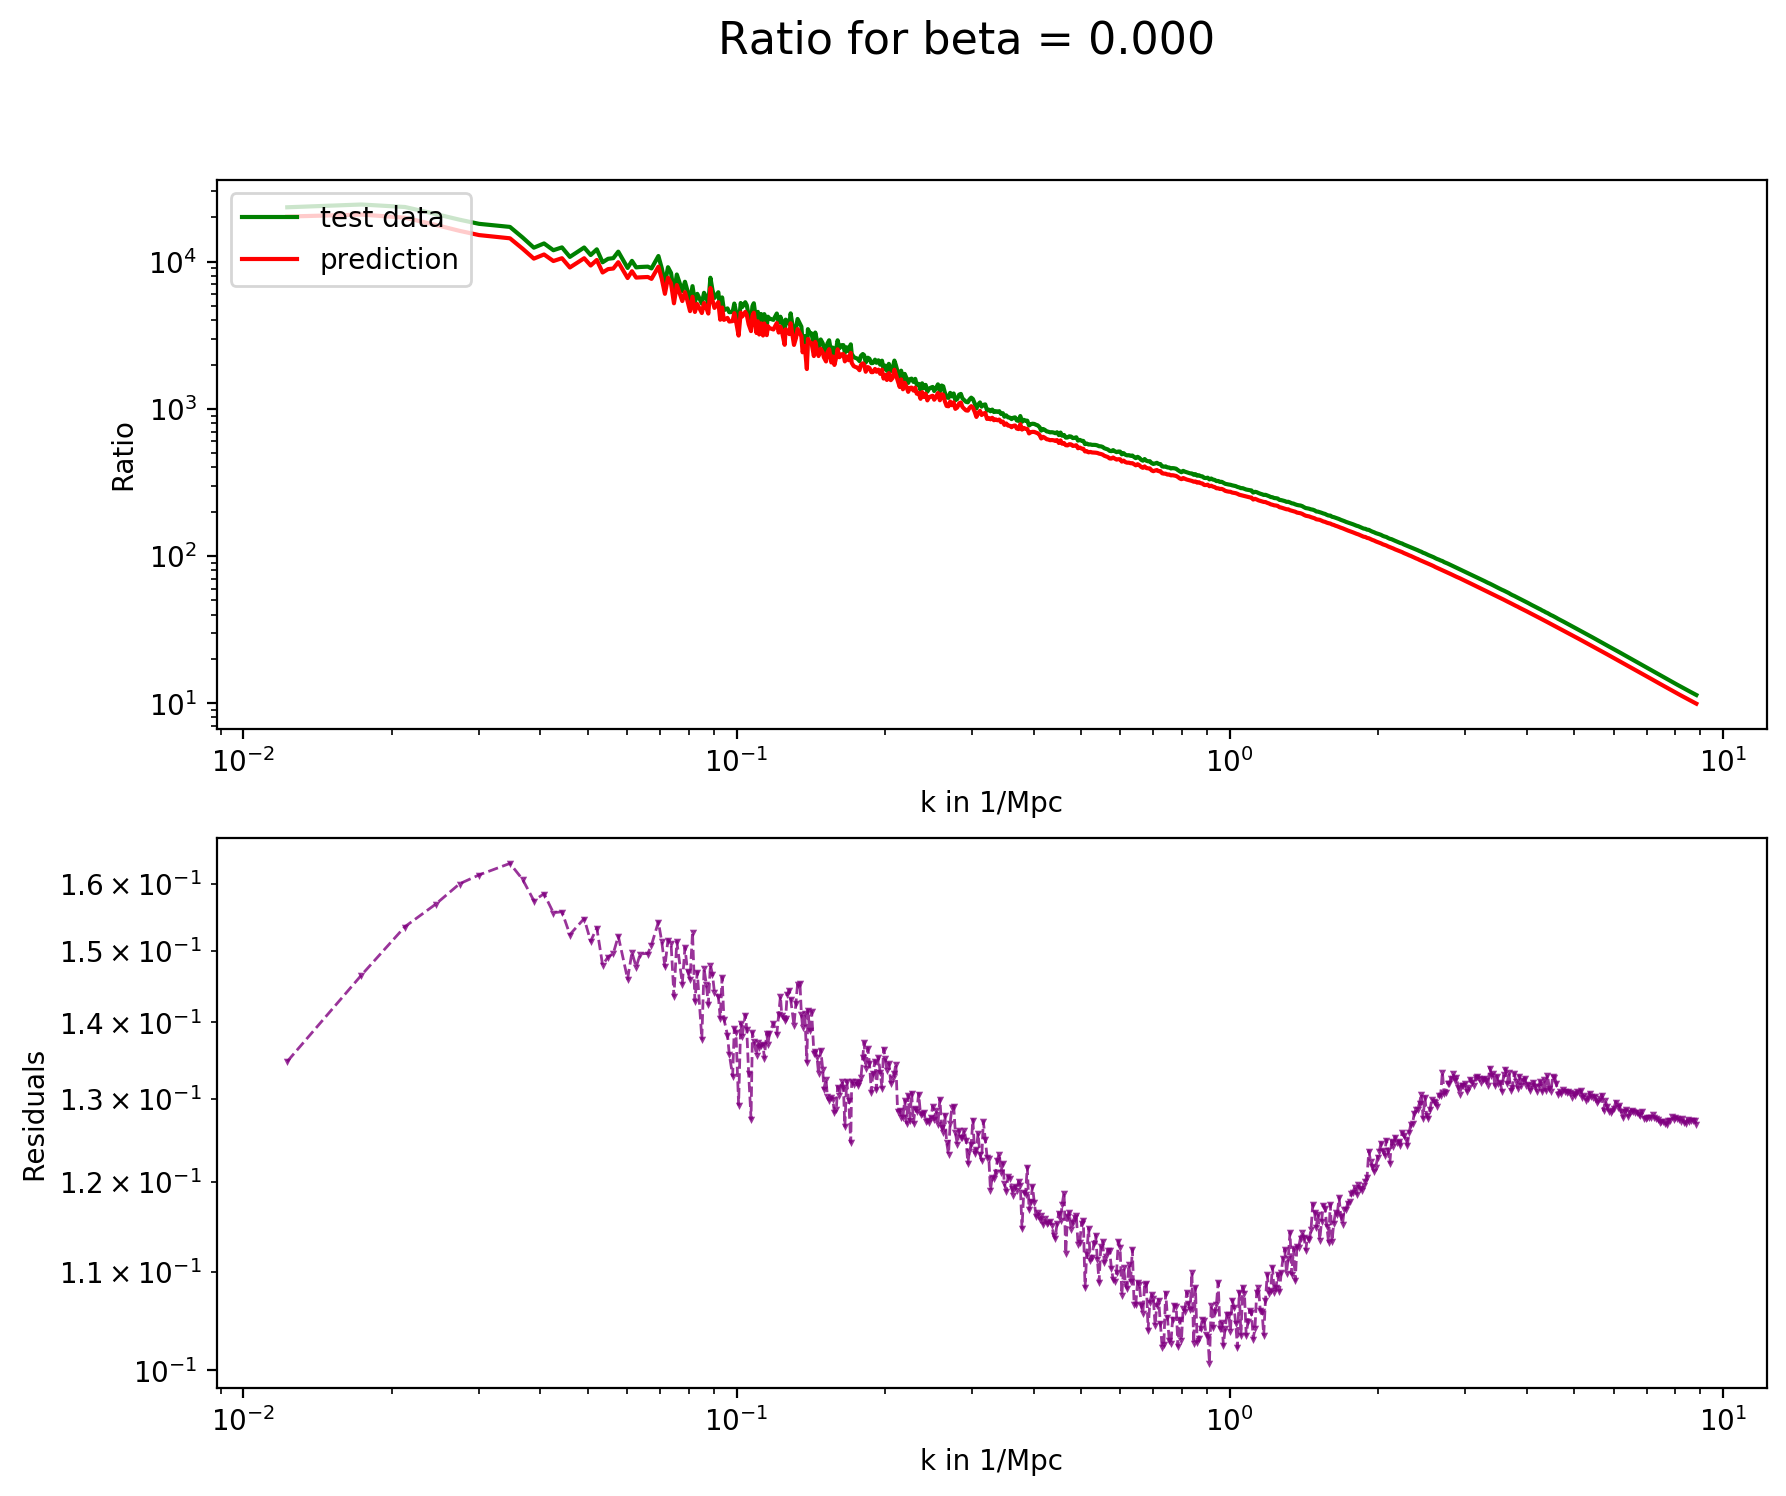

In [65]:
reconstructed_spectra = dcl.reconstruct_spectra(ratios_predicted,emulation_data = emulation_data)
pm.Plot_prediction_One_parameter(emulation_data, 0.098 , reconstructed_spectra,ratio_mode=False,y_scale_log=True)